In [1]:
import numpy as np
import jPCA
import matplotlib.pyplot as plt
from jPCA.util import load_churchland_data, plot_projections

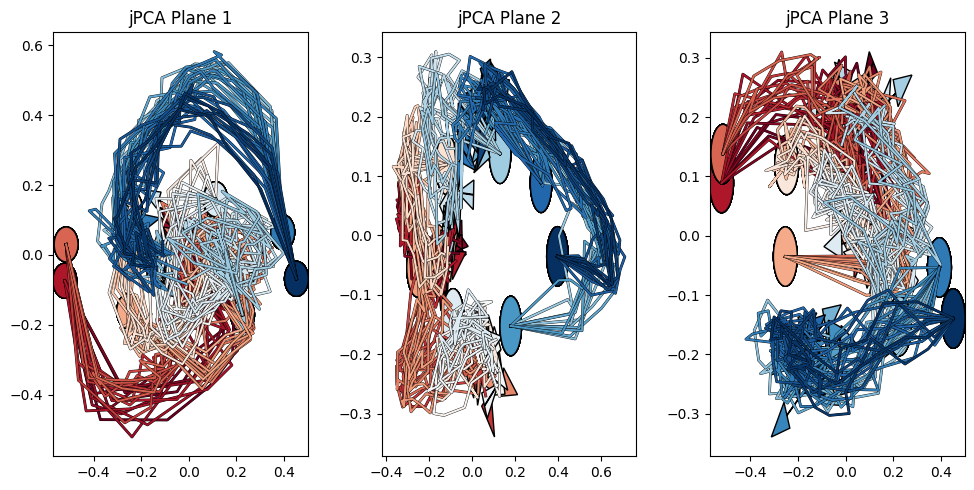

In [15]:
# Load publicly available data from Mark Churchland's group
A = "../jPCA_ForDistribution/exampleData.mat"
B = "Neural_Data.mat"
datasA, timesA = load_churchland_data(A)
datasB, timesB = load_churchland_data(B)

# Create a jPCA object
jpca = jPCA.JPCA(num_jpcs=6)


# Fit the jPCA object to data
(projected, 
 full_data_var,
 pca_var_capt,
 jpca_var_capt) = jpca.fit(datasB, times=timesB, tstart=0.05, tend=0.75) 
 
# Plot the projected data
# x_idx and y_idx control which columns of the data are shown.
# For example, to plot the second jPCA plane, use x_idx=2, y_idx=3
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

plot_projections(projected, axis=axes[0], x_idx=0, y_idx=1)
plot_projections(projected, axis=axes[1], x_idx=2, y_idx=3)
plot_projections(projected, axis=axes[2], x_idx=0, y_idx=3)


axes[0].set_title("jPCA Plane 1")
axes[1].set_title("jPCA Plane 2")
axes[2].set_title("jPCA Plane 3")
plt.tight_layout()
plt.show()

In [17]:
# Here's how we would get the variance of first plane:
print("Variance captured by each jPC:")
jpca_var_capt / full_data_var

Variance captured by each jPC:


array([0.09230168, 0.10717949, 0.19683981, 0.06075826, 0.40254705,
       0.08912518])

In [18]:
# Example of getting the eigenvalues of M_skew
print("Eigenvalues of M_skew:")
np.round(np.linalg.eigvals(jpca.M_skew), 3)

Eigenvalues of M_skew:


array([ 0.+0.243j,  0.-0.243j,  0.+0.052j,  0.-0.052j, -0.+0.071j,
       -0.-0.071j])